# Problem Statement 2

Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment . Consider following example for better understanding. Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events. In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”. Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing how drop-off rate is, dropoff rate is defined as number of patients dropping off each month. Then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# to load the parquet file first we need to install pyarrow package
! pip install pyarrow

In [4]:
# Loading the data
train_data_df = pd.read_parquet('Train.parquet')

We are going to follow the same preprocessing techniques as we used earlier.

In [5]:
# to view the data 
train_data_df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [6]:
# To get the first 5 rows
train_data_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [7]:
# to get the last 5 rows
train_data_df.tail()

,Patient-Uid,Date,Incident
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6
29080911,a0ee146e-1c7c-11ec-baee-16262ee38c7f,2018-10-05,DRUG_TYPE_1


In [8]:
# to get the shape of the dataset
train_data_df.shape

(3220868, 3)

In [9]:
# to get the basic information of the dataset
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [10]:
# to get the unique values
train_data_df.nunique()

Patient-Uid    27033
Date            1977
Incident          57
dtype: int64

In [11]:
# to get the feature name
train_data_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [12]:
# to get the data types
train_data_df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [13]:
# to check if there is any null values present in the dataset
train_data_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [14]:
# to check if there is any duplicate values
train_data_df.duplicated().sum()

35571

In [15]:
# to drop the duplicate values
train_data_df.drop_duplicates(inplace = True)

In [16]:
# to check if the values are dropped, we can confirm with the shape function
train_data_df.shape

(3185297, 3)

In [17]:
# to filter the data for patients who have taken the Target Drug
target_drug_data = train_data_df[train_data_df['Incident'] == 'TARGET DRUG']

In [18]:
# to calculate the drop off rate per month
dropoff_rate = target_drug_data['Date'].dt.to_period('M').value_counts().sort_index()

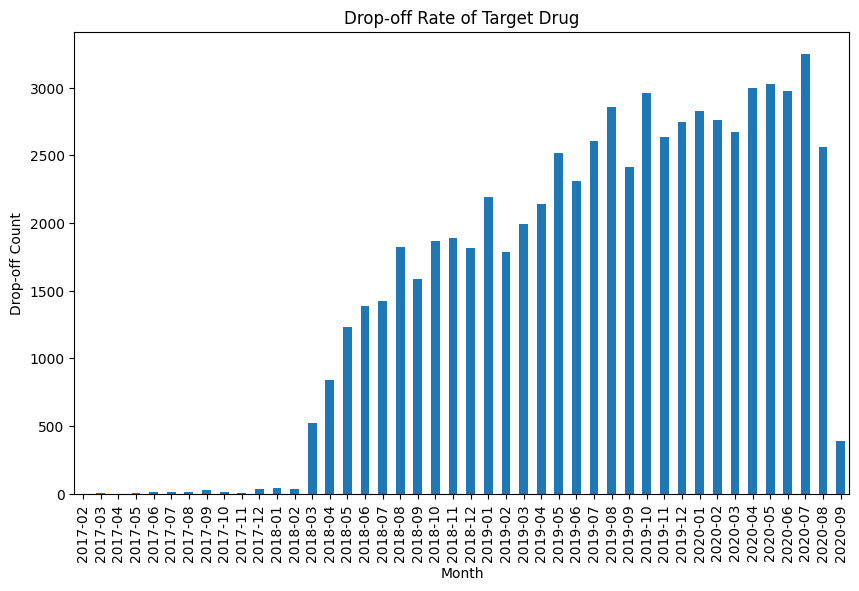

In [19]:
# to visualize the drop off rate over time
plt.figure(figsize = (10, 6))
dropoff_rate.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug')
plt.show()

In [21]:
# to analyze events driving dropp-off
dropoff_reasons = train_data_df[train_data_df['Patient-Uid'].isin(target_drug_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

In [22]:
# to calculate the frequency of each event leading to drop-off
event_frequency = dropoff_reasons['Incident'].value_counts()

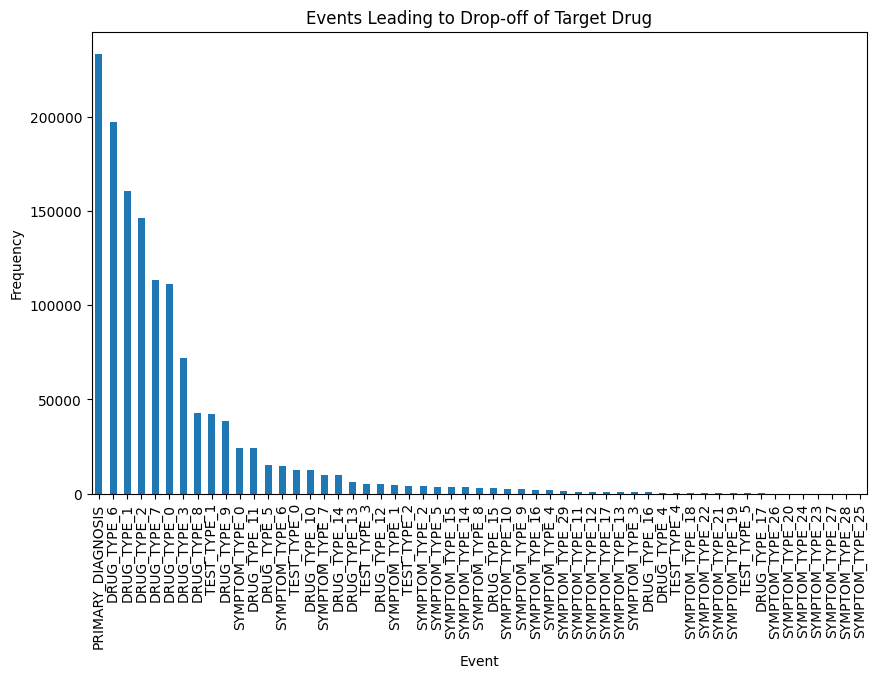

In [23]:
# Plot the events leading to drop-off
plt.figure(figsize=(10, 6))
event_frequency.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()